In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [168]:
link = "https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats"

data = pd.read_html(link)

df = data[0]

In [170]:
long = df.iloc[:, df.columns.get_level_values(0) == 'Long']
short = df.iloc[:, df.columns.get_level_values(0) == 'Short']
med = df.iloc[:, df.columns.get_level_values(0) == 'Medium']

long.columns = long.columns.droplevel(0)
short.columns = short.columns.droplevel(0)
med.columns = med.columns.droplevel(0)

long = long.rename(columns={"Cmp": "LongCmp", "Att":"LongAtt"})
short = short.rename(columns={"Cmp": "ShortCmp", "Att": "ShortAtt"})
med = med.rename(columns={"Cmp": "MedCmp", "Att": "MedAtt"})  

long = long[['LongCmp', 'LongAtt']]
short = short[['ShortCmp', 'ShortAtt']]
med = med[['MedCmp', 'MedAtt']]

In [171]:
df.columns = df.columns.droplevel(0)
players = df[['Player', 'Pos', 'Squad', 'Comp', '90s', 'TotDist', 'PrgDist']]

In [172]:
pass_df = pd.concat([players, short, med, long], axis=1)

In [173]:
gk_df = pass_df.loc[pass_df['Pos'] == "GK"]

In [174]:
gk_df = gk_df.dropna()
gk_df = gk_df.reset_index(drop=True)

In [175]:
gk_df['90s'] = gk_df['90s'].astype(float)
gk_df['ShortCmp'] = gk_df['ShortCmp'].astype(float)
gk_df['ShortAtt'] = gk_df['ShortAtt'].astype(float)
gk_df['MedCmp'] = gk_df['MedCmp'].astype(float)
gk_df['MedAtt'] = gk_df['MedAtt'].astype(float)
gk_df['LongCmp'] = gk_df['LongCmp'].astype(float)
gk_df['LongAtt'] = gk_df['LongAtt'].astype(float)

gk_df['TotDist'] = gk_df['TotDist'].astype(int)
gk_df['PrgDist'] = gk_df['PrgDist'].astype(int)

In [176]:
for i in range(len(gk_df)):
    splitted = gk_df['Comp'][i].split(' ')
    new_str = ""
    for j in range(len(splitted)):
        if j != 0:
            new_str = new_str + " " + splitted[j]
    new_str = new_str[1:]
    gk_df['Comp'][i] = new_str

/var/folders/l7/n7n_3gyn2zvf2dg9vb0f1s9w0000gn/T/ipykernel_1275/2238542119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_df['Comp'][i] = new_str


In [177]:
eng = gk_df.loc[gk_df['Comp'] == "Premier League"]
ger = gk_df.loc[gk_df['Comp'] == "Bundesliga"]
esp = gk_df.loc[gk_df['Comp'] == "La Liga"]
fra = gk_df.loc[gk_df['Comp'] == "Ligue 1"]
ita = gk_df.loc[gk_df['Comp'] == "Serie A"]

max_mins_eng = eng['90s'].max()
max_mins_ger = ger['90s'].max()
max_mins_esp = esp['90s'].max()
max_mins_fra = fra['90s'].max()
max_mins_ita = ita['90s'].max()

In [178]:
gk_df.head(5)

,Player,Pos,Squad,Comp,90s,TotDist,PrgDist,ShortCmp,ShortAtt,MedCmp,MedAtt,LongCmp,LongAtt
0,Doğan Alemdar,GK,Rennes,Ligue 1,2.5,1486,1243,10.0,10.0,23.0,23.0,16.0,38.0
1,Alisson,GK,Liverpool,Premier League,17.0,12749,8270,122.0,122.0,260.0,266.0,143.0,230.0
2,Alphonse Areola,GK,West Ham,Premier League,1.2,852,696,9.0,9.0,10.0,10.0,10.0,22.0
3,Kepa Arrizabalaga,GK,Chelsea,Premier League,8.5,5707,3441,101.0,102.0,96.0,97.0,62.0,121.0
4,Sergio Asenjo,GK,Valladolid,La Liga,5.0,3716,2668,18.0,18.0,60.0,62.0,41.0,98.0


In [195]:
grouped = gk_df.groupby(['Comp']).sum()
grouped = grouped.reset_index(level=0)
grouped

,Comp,90s,TotDist,PrgDist,ShortCmp,ShortAtt,MedCmp,MedAtt,LongCmp,LongAtt
0,Bundesliga,270.0,232578,168499,1471.0,1484.0,3924.0,3987.0,2753.0,5467.0
1,La Liga,320.0,224261,166702,1229.0,1244.0,3673.0,3746.0,2683.0,5669.0
2,Ligue 1,334.0,210014,152843,1452.0,1466.0,3574.0,3655.0,2507.0,5234.0
3,Premier League,352.0,225777,156202,2056.0,2077.0,3839.0,3898.0,2548.0,5795.0
4,Serie A,340.0,246419,172879,1651.0,1658.0,3992.0,4059.0,3089.0,6266.0


In [202]:
grouped['Dist'] = round(grouped['TotDist'] / grouped['90s'], 2)
grouped['Prg'] = round(grouped['PrgDist'] / grouped['90s'], 2)
grouped['Short'] = round(grouped['ShortCmp'] / grouped['90s'], 2)
grouped['Med'] = round(grouped['MedCmp'] / grouped['90s'], 2)
grouped['Long'] = round(grouped['LongCmp'] / grouped['90s'], 2)

df_per_comp = grouped[['Comp', 'Dist', 'Prg', 'Short', 'Med', 'Long']]

In [203]:
df_per_comp['Total'] = df_per_comp['Short'] + df_per_comp['Med'] + df_per_comp['Long']

In [204]:
df_per_comp['AvgDist'] = round(df_per_comp['Dist'] / df_per_comp['Total'], 2)
df_per_comp['AvgPrgDist'] = round(df_per_comp['Prg'] / df_per_comp['Total'], 2)

In [205]:
df_per_comp

,Comp,Dist,Prg,Short,Med,Long,Total,AvgDist,AvgPrgDist
0,Bundesliga,861.40,624.07,5.45,14.53,10.20,30.18,28.54,20.68
1,La Liga,700.82,520.94,3.84,11.48,8.38,23.70,29.57,21.98
2,Ligue 1,628.78,457.61,4.35,10.70,7.51,22.56,27.87,20.28
3,Premier League,641.41,443.76,5.84,10.91,7.24,23.99,26.74,18.50
4,Serie A,724.76,508.47,4.86,11.74,9.09,25.69,28.21,19.79


In [211]:
gk_df['Total'] = gk_df['ShortCmp'] + gk_df['MedCmp'] + gk_df['LongCmp']
gk_df['AvgTotDist'] = round(gk_df['TotDist'] / gk_df['Total'], 2)
gk_df['AvgPrgDist'] = round(gk_df['PrgDist'] / gk_df['Total'], 2)

gk_df['TotPG'] = round(gk_df['Total'] / gk_df['90s'], 2)

In [212]:
gk_df = gk_df.loc[gk_df['90s'] > 5]
gk_df = gk_df.reset_index(drop=True)

gk_df.head(5)

,Player,Pos,Squad,Comp,90s,TotDist,PrgDist,ShortCmp,ShortAtt,MedCmp,MedAtt,LongCmp,LongAtt,Total,AvgTotDist,AvgPrgDist,TotPG
0,Alisson,GK,Liverpool,Premier League,17.0,12749,8270,122.0,122.0,260.0,266.0,143.0,230.0,525.0,24.28,15.75,30.88
1,Kepa Arrizabalaga,GK,Chelsea,Premier League,8.5,5707,3441,101.0,102.0,96.0,97.0,62.0,121.0,259.0,22.03,13.29,30.47
2,Emil Audero,GK,Sampdoria,Serie A,17.0,12562,9401,62.0,62.0,159.0,161.0,181.0,383.0,402.0,31.25,23.39,23.65
3,Édgar Badía,GK,Elche,La Liga,16.0,11242,8753,39.0,40.0,166.0,172.0,148.0,272.0,353.0,31.85,24.80,22.06
4,Oliver Baumann,GK,Hoffenheim,Bundesliga,15.0,13460,9092,146.0,146.0,269.0,273.0,138.0,251.0,553.0,24.34,16.44,36.87


In [213]:
eng_df = gk_df.loc[gk_df['Comp'] == "Premier League"]
ger_df = gk_df.loc[gk_df['Comp'] == "Bundesliga"]
esp_df = gk_df.loc[gk_df['Comp'] == "La Liga"]
fra_df = gk_df.loc[gk_df['Comp'] == "Ligue 1"]
ita_df = gk_df.loc[gk_df['Comp'] == "Serie A"]

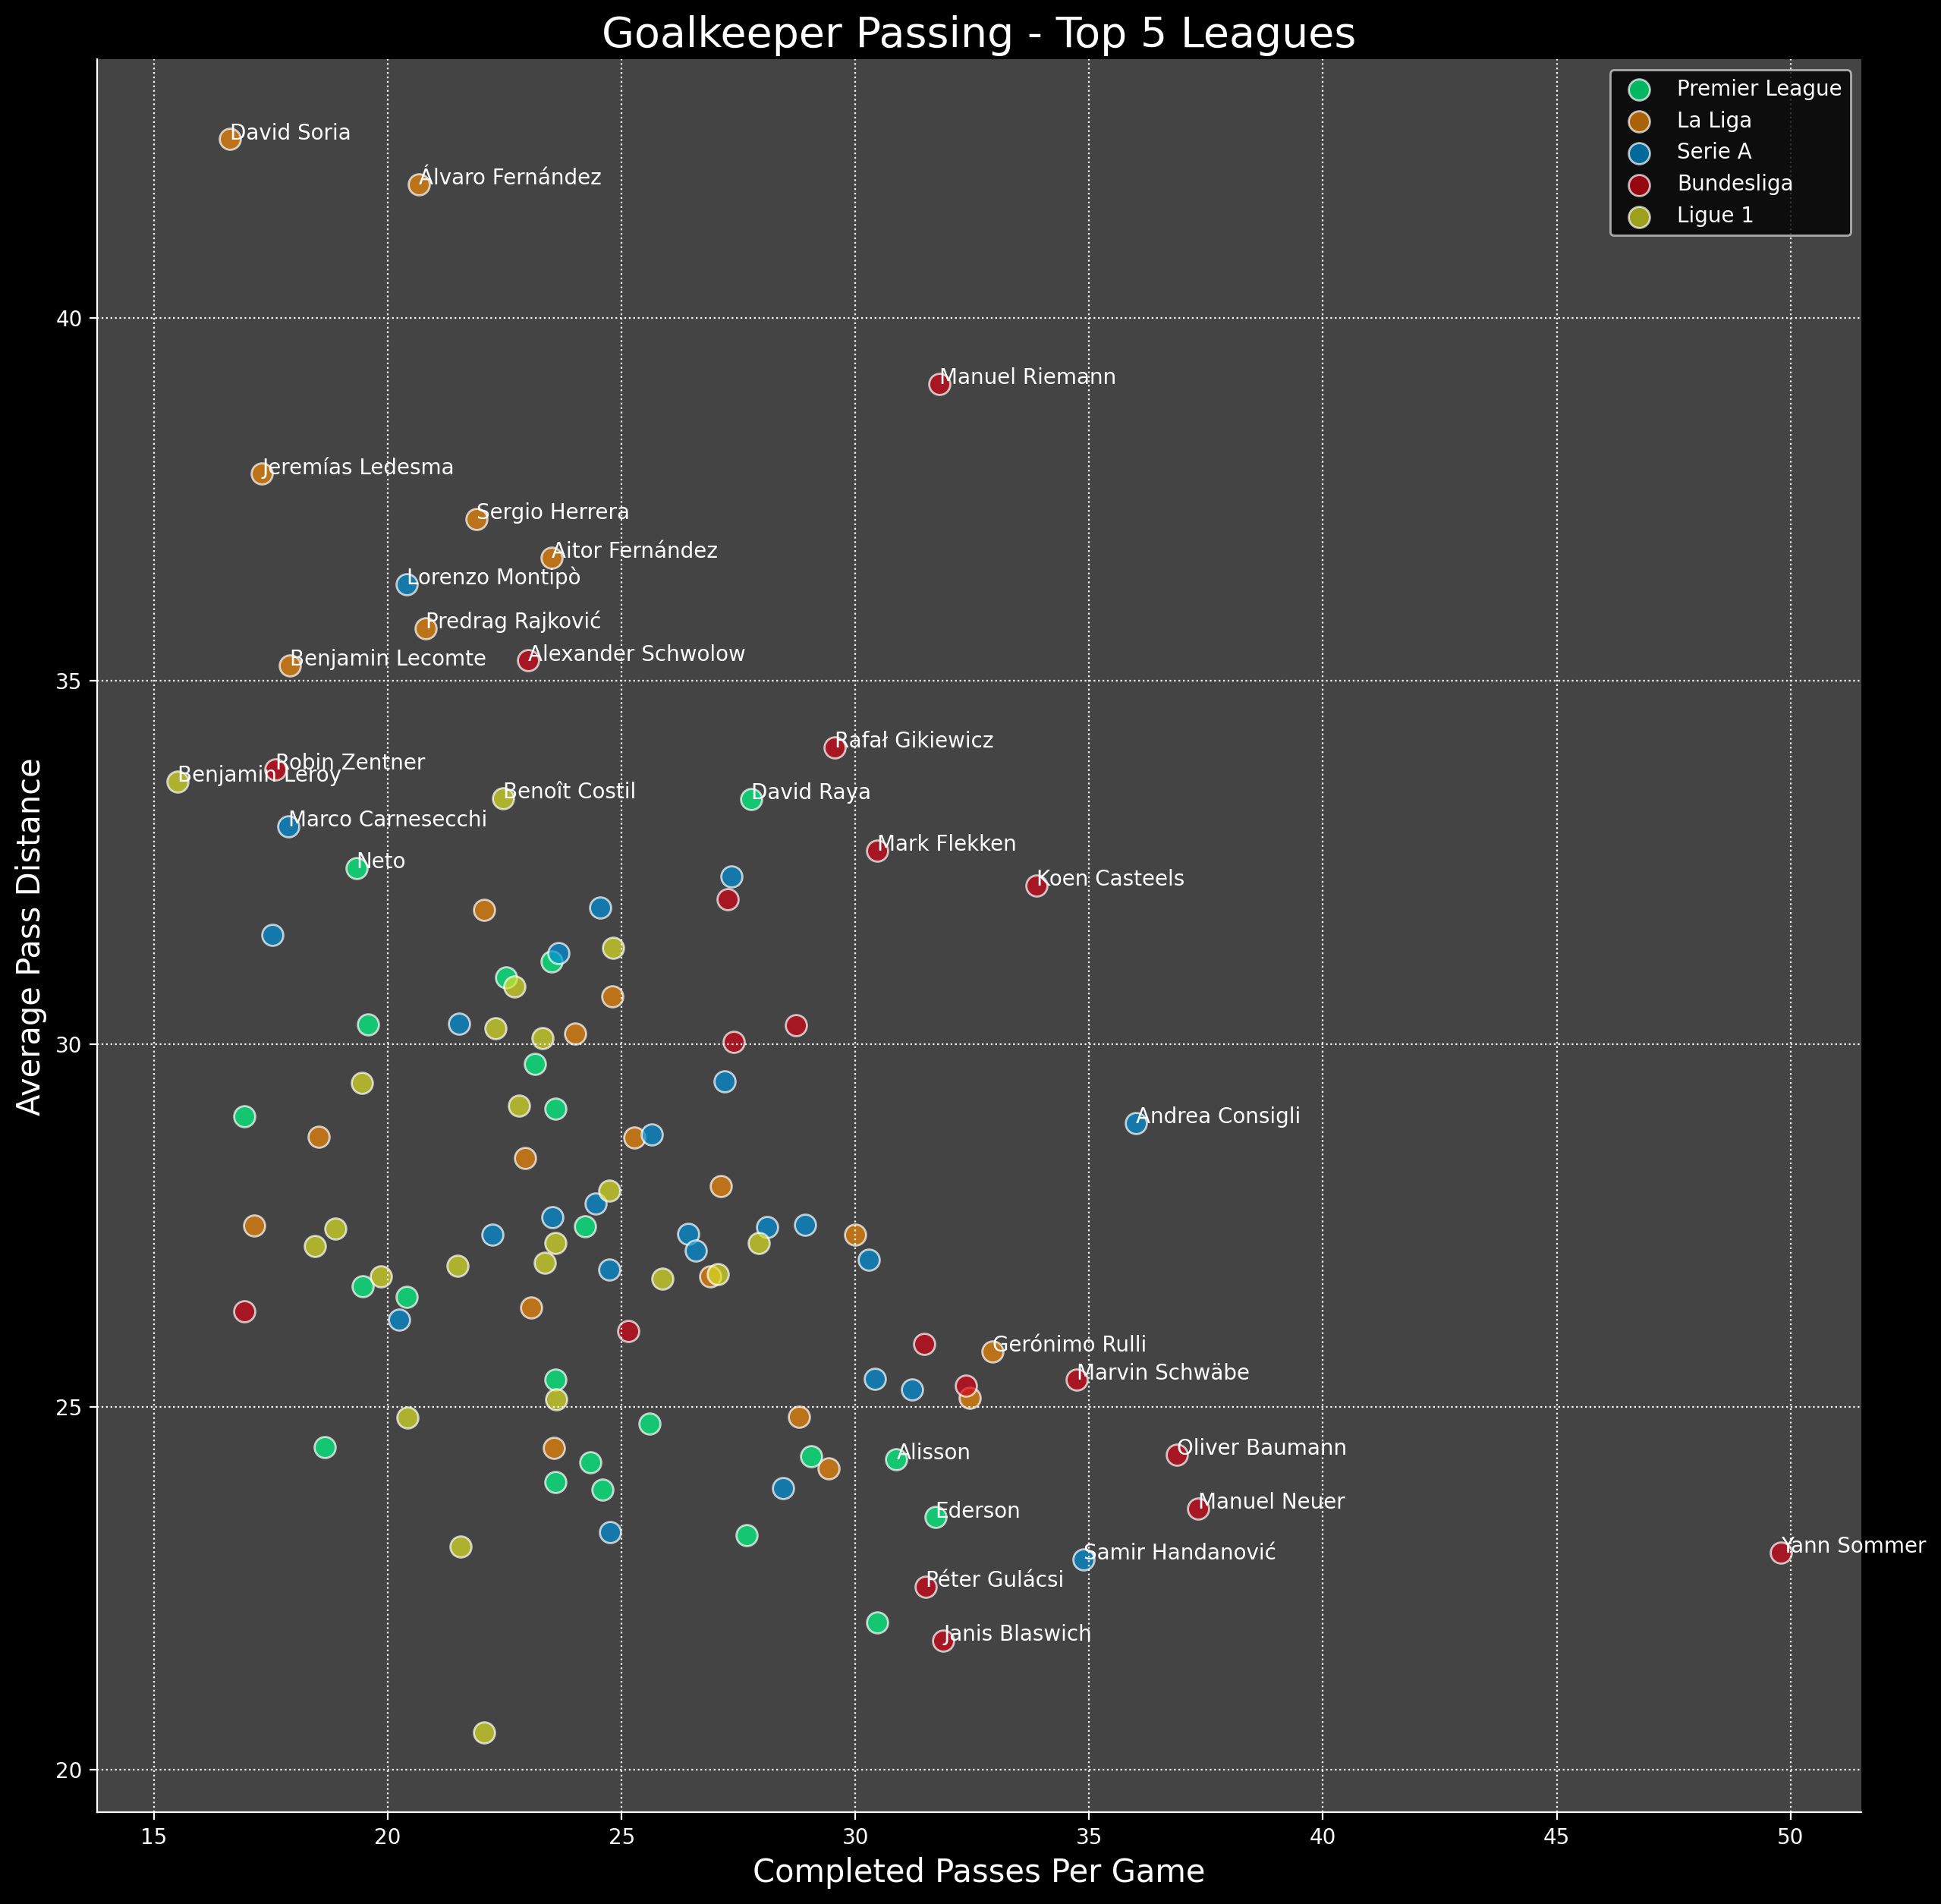

In [282]:
## Creating visualisation

plt.figure(figsize = (15,15), dpi = 200, facecolor = 'black')

ax = plt.axes()
ax.set_facecolor("#444444")

ax.grid(True, c = "white", ls = ":")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color("white")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("white")

plt.scatter(eng_df['TotPG'], eng_df['AvgTotDist'], s = 100, c = "#00ff85", ec = "white", alpha = 0.7, label = "Premier League")
plt.scatter(esp_df['TotPG'], esp_df['AvgTotDist'], s = 100, c = "#ee8707", ec = "white", alpha = 0.7, label = "La Liga")
plt.scatter(ita_df['TotPG'], ita_df['AvgTotDist'], s = 100, c = "#008fd7", ec = "white", alpha = 0.7, label = "Serie A")
plt.scatter(ger_df['TotPG'], ger_df['AvgTotDist'], s = 100, c = "#d20515", ec = "white", alpha = 0.7, label = "Bundesliga")
plt.scatter(fra_df['TotPG'], fra_df['AvgTotDist'], s = 100, c = "#dae025", ec = "white", alpha = 0.7, label = "Ligue 1")

for i, row in gk_df.iterrows():
    if row['AvgTotDist'] > 25 and row['AvgTotDist'] < 30 and row['TotPG'] > 30 and row['TotPG'] < 32.5:
        plt.text(row['TotPG'], row['AvgTotDist'], s="") 
    elif row['AvgTotDist'] > np.percentile(eng_df['AvgTotDist'], 95):
        plt.text(row['TotPG'], row['AvgTotDist'], s=row['Player'], color="white")
    elif row['TotPG'] > np.percentile(eng_df['TotPG'], 95):
        plt.text(row['TotPG'], row['AvgTotDist'], s=row['Player'], color="white")

plt.title("Goalkeeper Passing - Top 5 Leagues", fontsize = 20, color="white")

plt.xlabel("Completed Passes Per Game", fontsize = 15, color="white")
plt.ylabel("Average Pass Distance", fontsize = 15, color="white")

plt.tick_params(colors='white')

plt.legend(facecolor = "black", labelcolor="white")

plt.show()